In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [8]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
data=pd.read_csv('stroke.csv')
data.head()
data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
data.shape

(5110, 10)

In [12]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [14]:
data.corr

<bound method DataFrame.corr of       gender   age  hypertension  heart_disease      work_type Residence_type  \
0       Male  67.0             0              1        Private          Urban   
1     Female  61.0             0              0  Self-employed          Rural   
2       Male  80.0             0              1        Private          Rural   
3     Female  49.0             0              0        Private          Urban   
4     Female  79.0             1              0  Self-employed          Rural   
...      ...   ...           ...            ...            ...            ...   
5105  Female  80.0             1              0        Private          Urban   
5106  Female  81.0             0              0  Self-employed          Urban   
5107  Female  35.0             0              0  Self-employed          Rural   
5108    Male  51.0             0              0        Private          Rural   
5109  Female  44.0             0              0       Govt_job          Urban

**IMPUTATION OF MISSING VALUES**

In [15]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
data.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [17]:
data['bmi'] = data['bmi'].fillna(28.89)

In [18]:
data.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [19]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

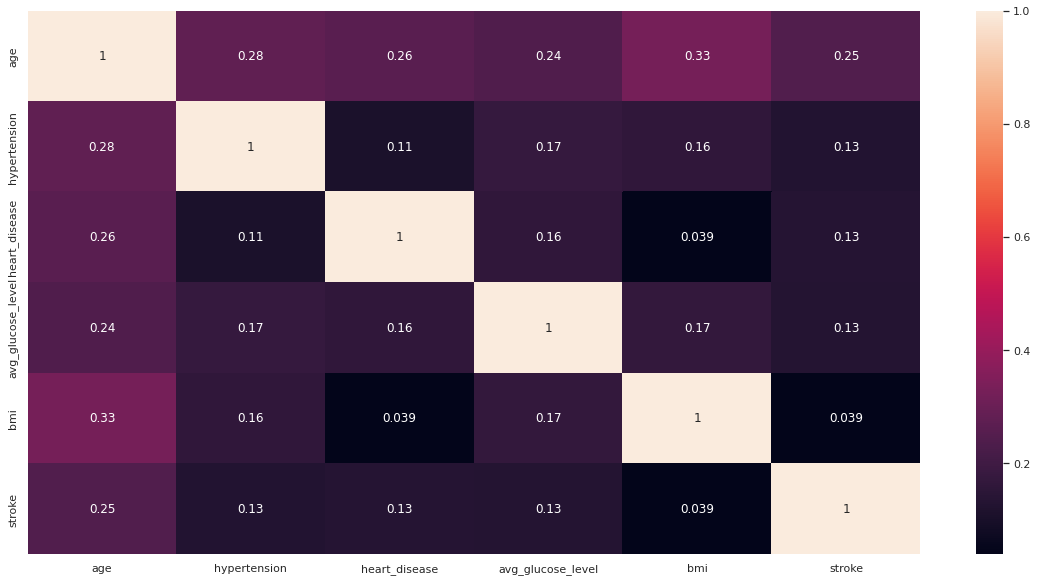

In [20]:
plt.figure(figsize=[20,10])

sns.heatmap(data.corr(),annot=True)

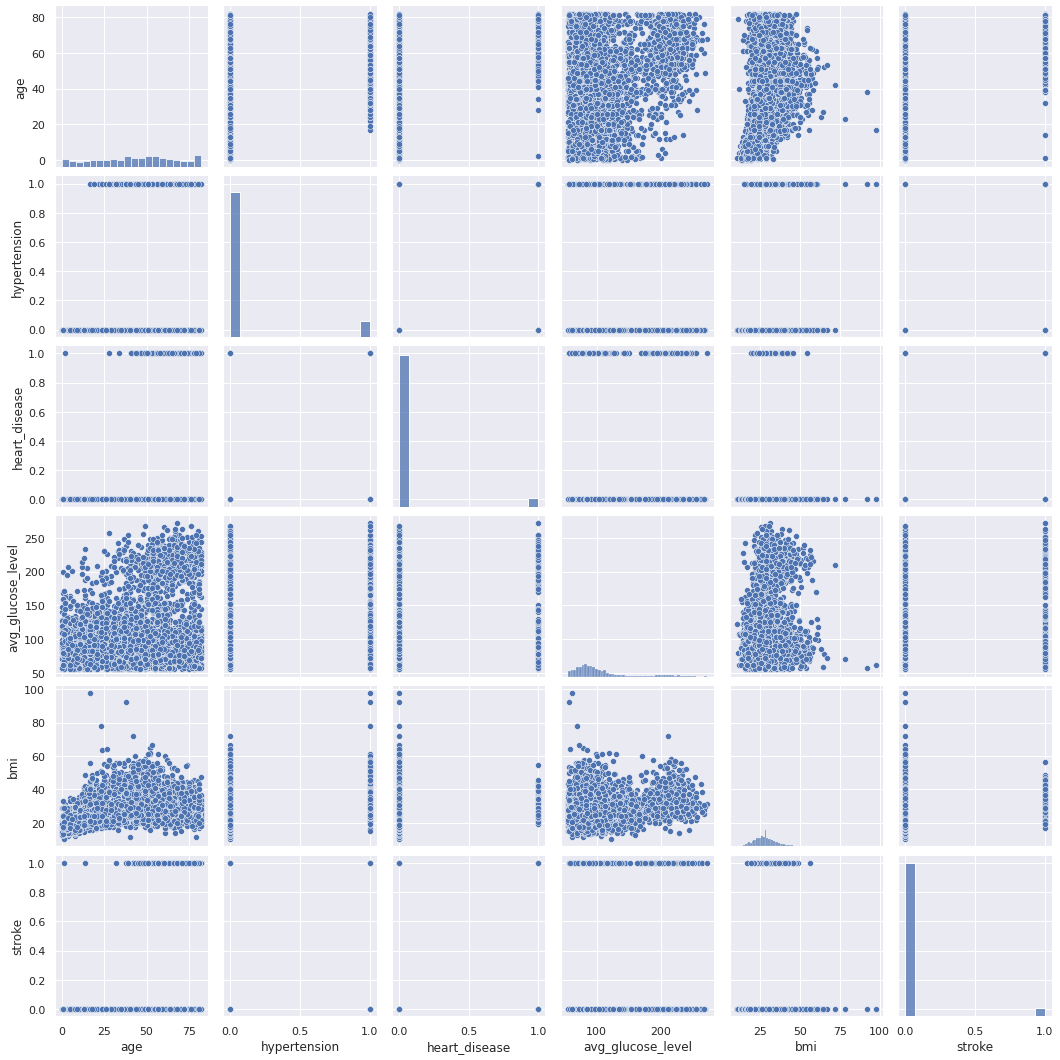

In [21]:
sns.pairplot( data )

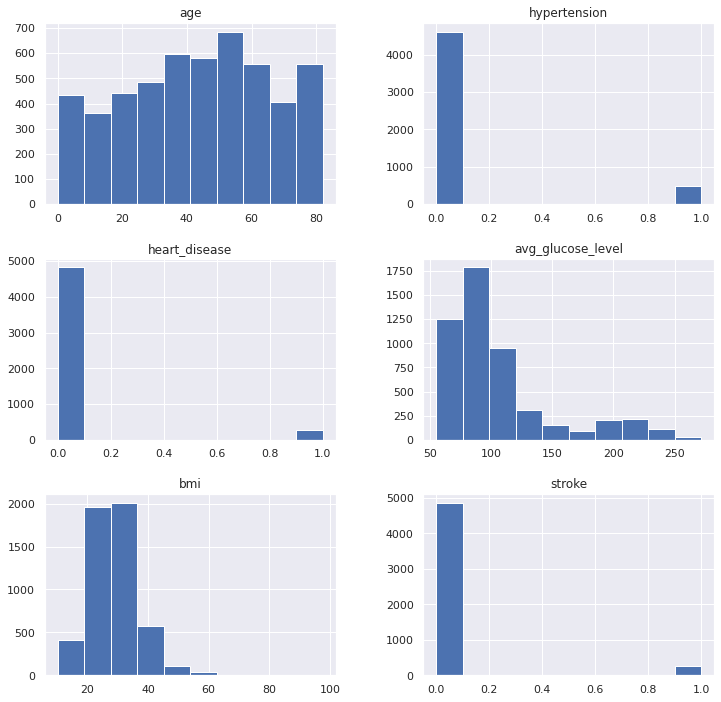

In [22]:
data.hist(figsize = (12, 12))
plt.show()

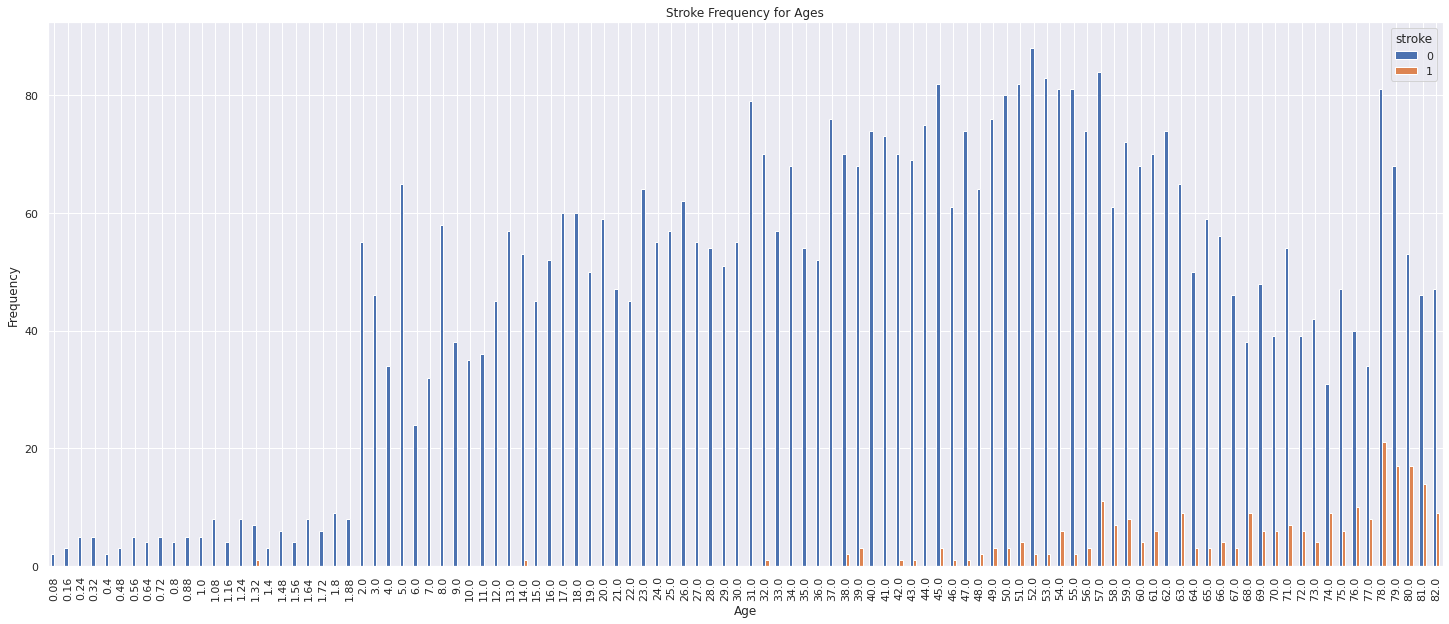

In [23]:
pd.crosstab(data.age,data.stroke).plot(kind="bar",figsize=(25,10))
plt.title('Stroke Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**DATA PRE-PROCESSING**

In [24]:
from sklearn import preprocessing
string_to_int=preprocessing.LabelEncoder()
data=data.apply(string_to_int.fit_transform)
data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,2,1,3850,240,1,1
1,0,82,0,0,3,0,3588,162,2,1
2,1,101,0,1,2,0,2483,199,2,1
3,0,70,0,0,2,1,3385,218,3,1
4,0,100,1,0,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,2,1,1360,162,2,0
5106,0,102,0,0,3,1,3030,274,2,0
5107,0,56,0,0,3,0,1314,180,2,0
5108,1,72,0,0,2,0,3363,129,1,0


In [25]:
x = data.drop(['stroke'],axis=1)
y = data['stroke']

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
# define the model
model = LinearRegression()
 
# estimating the bias and variance
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
                                                            y_train, X_test,
                                                            y_test,
                                                            loss='mse',
                                                            num_rounds=50,
                                                            random_seed=20)
 
# summary of the results
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

**SPLITTING OF DATASET**

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

**CONVENTIONAL CLASSIFIERS**

# **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [28]:
logisticRegr.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
predictions = logisticRegr.predict(xtest)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [31]:
cm = metrics.confusion_matrix(ytest, predictions)
print(cm)

[[957   3]
 [ 62   0]]


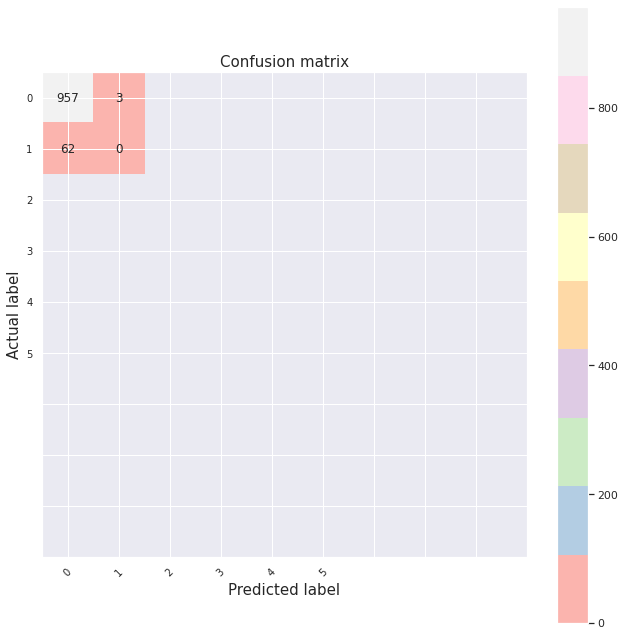

In [32]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1","2","3","4","5"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1","2","3","4","5"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')

In [54]:
score = logisticRegr.score(xtest, ytest)

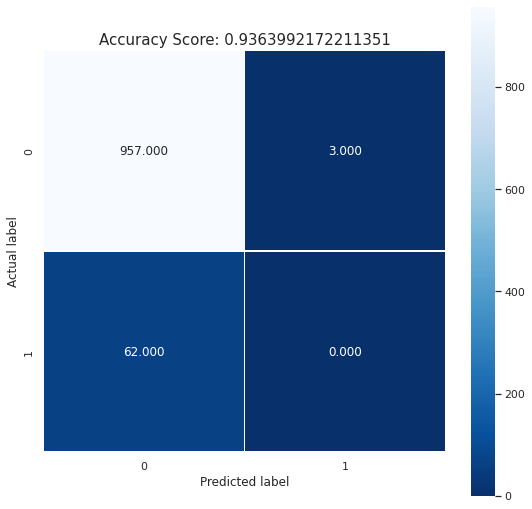

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [56]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
lr=LogisticRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)

y_predict = lr.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict)) 
print('root mean squared error is == {}'.format(rms))

mean_sqrd_error is == 0.060665362035225046
root mean squared error is == 0.24630339428279313


In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(ytest, y_pred))
print("Precision:",precision_score(ytest, y_pred))
print("Recall:",recall_score(ytest, y_pred)) 
print('F1 Score: %.3f' % f1_score(ytest, y_pred))

Accuracy: 0.9363992172211351
Precision: 0.0
Recall: 0.0
F1 Score: 0.000


PCA Implementation on Logistic Regression Model for better Decision Boundary

In [61]:
columns = xtrain.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(xtrain)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(xtest)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

In [62]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

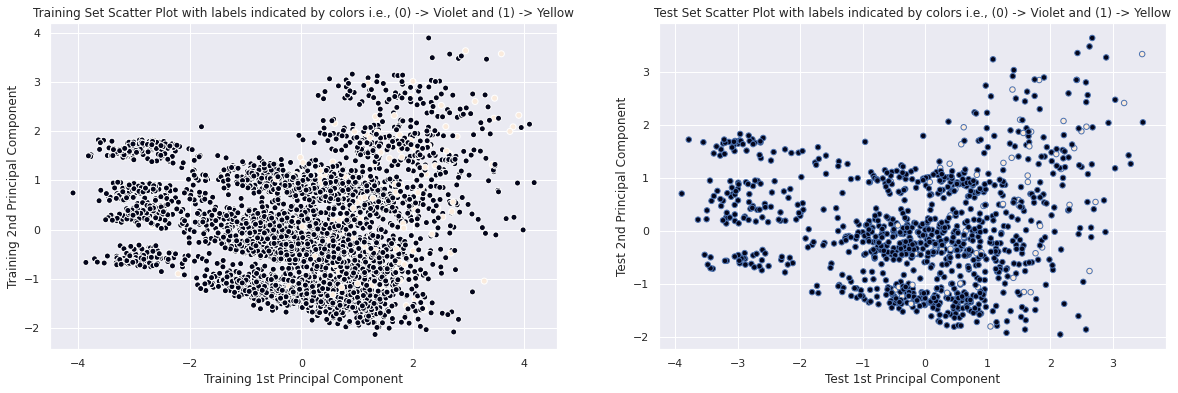

In [63]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = ytrain, edgecolor='white')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = ytest, edgecolor='b', s=30)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()


In [64]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01, 0.1, 1, 10, 100]}

clf = LogisticRegression()

folds = 5
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 3)

model_cv.fit(X_train_pca, ytrain)
print(model_cv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.01;, score=(train=0.954, test=0.955) total time=   0.0s
[CV 2/5] END ........C=0.01;, score=(train=0.954, test=0.954) total time=   0.0s
[CV 3/5] END ........C=0.01;, score=(train=0.954, test=0.954) total time=   0.0s
[CV 4/5] END ........C=0.01;, score=(train=0.954, test=0.955) total time=   0.0s
[CV 5/5] END ........C=0.01;, score=(train=0.954, test=0.955) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=0.954, test=0.955) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.954, test=0.954) total time=   0.0s
[CV 3/5] END .........C=0.1;, score=(train=0.954, test=0.954) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=0.954, test=0.955) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=0.954, test=0.955) total time=   0.0s
[CV 1/5] END ...........C=1;, score=(train=0.954, test=0.955) total time=   0.0s
[CV 2/5] END ...........C=1;, score=(train=0.954,

In [65]:
model = LogisticRegression(C = 10).fit(X_train_pca, ytrain)

In [66]:
y_train_pred = model.predict(X_train_pca)

# getting the Test Set Predictions
y_test_pred = model.predict(X_test_pca)

In [67]:
print('Training Accuracy of the Model: ', metrics.accuracy_score(ytrain, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(ytest, y_test_pred))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(ytrain, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(ytest, y_test_pred))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(ytrain, y_train_pred))
print('Test Recall of the Model: ', metrics.recall_score(ytest, y_test_pred))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(ytrain, y_train_pred))
print('Test F1-Score of the Model: ', metrics.f1_score(ytest, y_test_pred))
print()

Training Accuracy of the Model:  0.9542563600782779
Test Accuracy of the Model:  0.9393346379647749

Training Precision of the Model:  0.0
Test Precision of the Model:  0.0

Training Recall of the Model:  0.0
Test Recall of the Model:  0.0

Training F1-Score of the Model:  0.0
Test F1-Score of the Model:  0.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


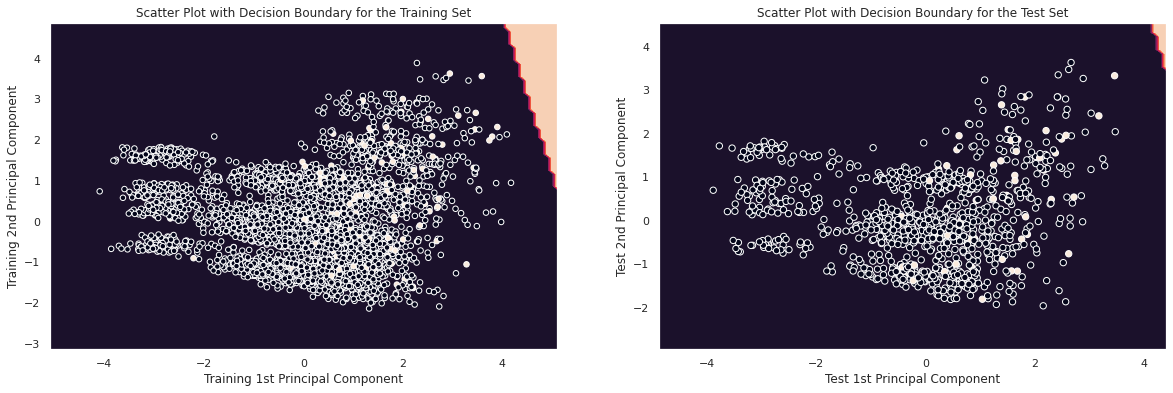

In [68]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = ytrain, s = 30, edgecolor = 'w')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = ytest, s = 40, edgecolor = 'w')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

Neural Networks

In [69]:
from sklearn.neural_network import MLPClassifier
#Initializing the MLPClassifier
classifier1 = MLPClassifier(hidden_layer_sizes=(7), max_iter=300,activation ='logistic',random_state=1)
classifier1.fit(xtrain, ytrain)

MLPClassifier(activation='logistic', hidden_layer_sizes=7, max_iter=300,
              random_state=1)

In [70]:
y_pred1 = classifier1.predict(xtest)

In [71]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred1, ytest)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9393346379647749


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(ytest, y_pred1))
print("Precision:",precision_score(ytest, y_pred1))
print("Recall:",recall_score(ytest, y_pred1)) 
print('F1 Score: %.3f' % f1_score(ytest, y_pred1))

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


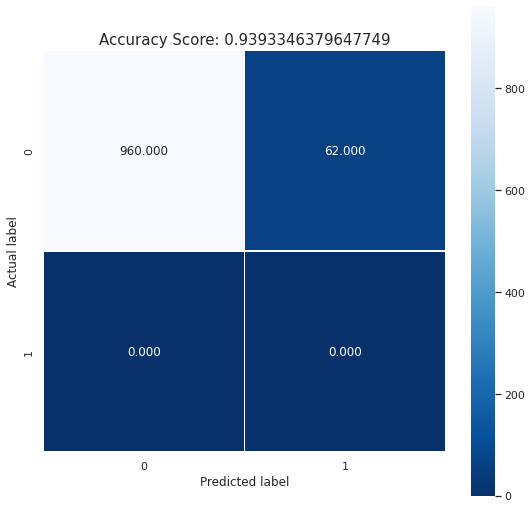

In [72]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [74]:
classifier2 = MLPClassifier(hidden_layer_sizes=(7,5), max_iter=300,activation ='logistic',random_state=1)
classifier2.fit(xtrain, ytrain)
y_pred2 = classifier2.predict(xtest)

In [75]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred2, ytest)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9393346379647749


In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(ytest, y_pred2))
print("Precision:",precision_score(ytest, y_pred2))
print("Recall:",recall_score(ytest, y_pred2)) 
print('F1 Score: %.3f' % f1_score(ytest, y_pred2))

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


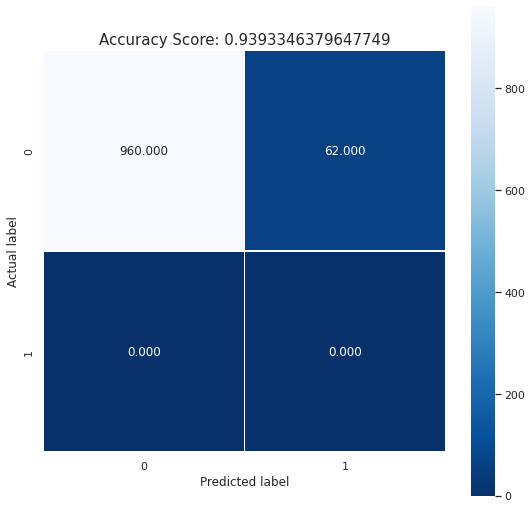

In [77]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [78]:
classifier3 = MLPClassifier(hidden_layer_sizes=(7), max_iter=1000,activation = 'relu',solver='adam',random_state=1)
classifier3.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=7, max_iter=1000, random_state=1)

In [79]:
y_pred3 = classifier3.predict(xtest)

In [80]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred3, ytest)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9393346379647749


In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(ytest, y_pred3))
print("Precision:",precision_score(ytest, y_pred3))
print("Recall:",recall_score(ytest, y_pred3)) 
print('F1 Score: %.3f' % f1_score(ytest, y_pred3))

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


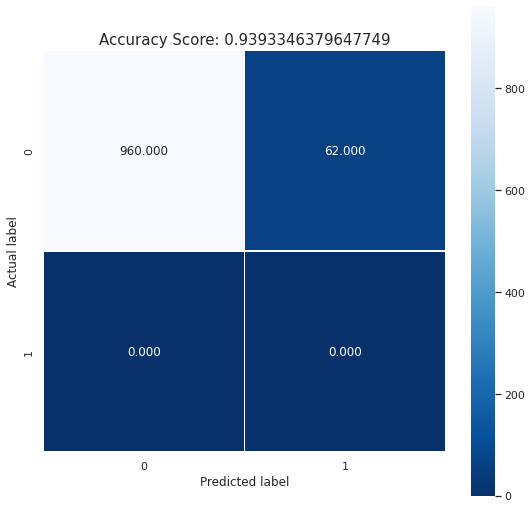

In [82]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [83]:
classifier4 = MLPClassifier(hidden_layer_sizes=(7,5), max_iter=1000,activation = 'relu',solver='adam',random_state=1)
classifier4.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(7, 5), max_iter=1000, random_state=1)

In [84]:
y_pred4 = classifier4.predict(xtest)


In [108]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred4, ytest)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9393346379647749


In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(ytest, y_pred3))
print("Precision:",precision_score(ytest, y_pred3))
print("Recall:",recall_score(ytest, y_pred3)) 
print('F1 Score: %.3f' % f1_score(ytest, y_pred3))

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


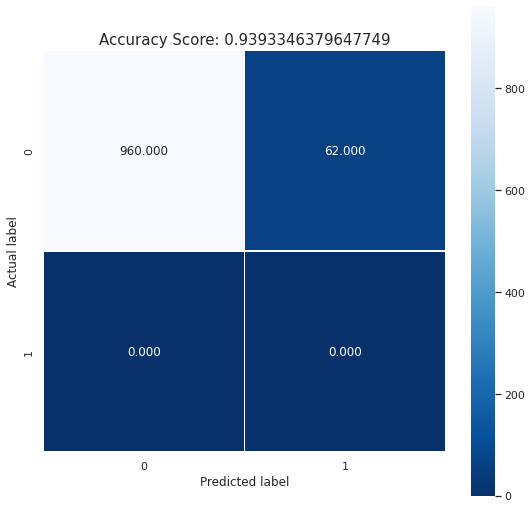

In [86]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [88]:
data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,2,1,3850,240,1,1
1,0,82,0,0,3,0,3588,162,2,1
2,1,101,0,1,2,0,2483,199,2,1
3,0,70,0,0,2,1,3385,218,3,1
4,0,100,1,0,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,2,1,1360,162,2,0
5106,0,102,0,0,3,1,3030,274,2,0
5107,0,56,0,0,3,0,1314,180,2,0
5108,1,72,0,0,2,0,3363,129,1,0


In [89]:
X = data[['avg_glucose_level','bmi','hypertension']]
Y = data.stroke 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [91]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
# Fit the model 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [92]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
# Fit the model  
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [93]:
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred 

In [94]:
def cal_accuracy(y_test, y_pred): print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

In [95]:
print("Results Using Gini Index:")
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 0]
Accuracy :  94.97716894977168
Results Using Entropy:
Predicted values:
[0 0 0 ... 0 0 0]
Accuracy :  95.49902152641879


In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("GINI -")
print("Accuracy:",accuracy_score(y_test, y_pred_gini))
print("Precision:",precision_score(y_test, y_pred_gini))
print("Recall:",recall_score(y_test, y_pred_gini)) 
print('F1 Score: %.3f' % f1_score(y_test, y_pred_gini))

print("ENTROPY -")
print("Accuracy:",accuracy_score(y_test, y_pred_entropy))
print("Precision:",precision_score(y_test, y_pred_entropy))
print("Recall:",recall_score(y_test, y_pred_entropy)) 
print('F1 Score: %.3f' % f1_score(y_test, y_pred_entropy))

GINI -
Accuracy: 0.9497716894977168
Precision: 0.1
Recall: 0.014492753623188406
F1 Score: 0.025
ENTROPY -
Accuracy: 0.9549902152641878
Precision: 0.0
Recall: 0.0
F1 Score: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
#Print tree
def printTree(classifier):
    feature_names = ['avg_glucose_level','bmi','hypertension']
    target_names = ['HD-Yes', 'HD-No']
    
    #Build the tree
    dot_data = tree.export_graphviz(classifier,                                      
                         out_file=None,feature_names=feature_names,
                         class_names=target_names, filled = True)
    
    #Draw tree
    tr = graphviz.Source(dot_data, format ="png")
    return tr

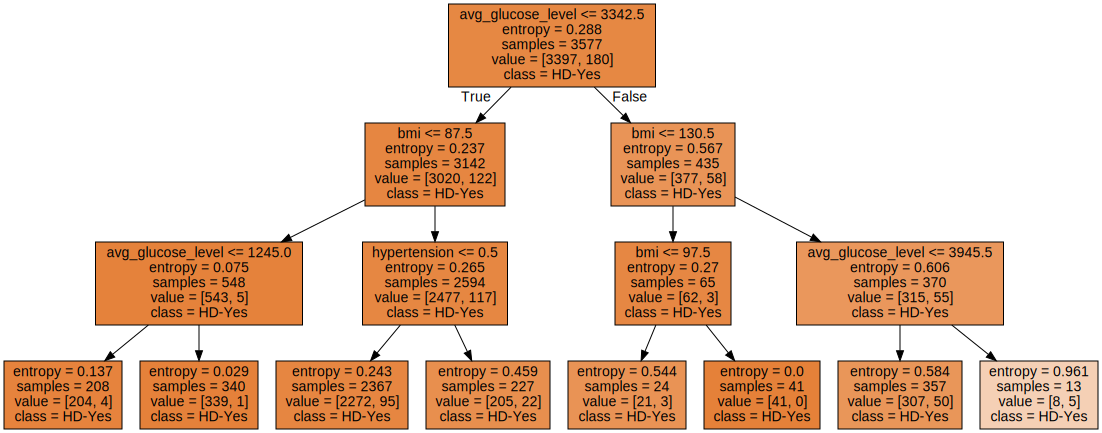

In [101]:
tr_entropy = printTree(clf_entropy)
tr_entropy

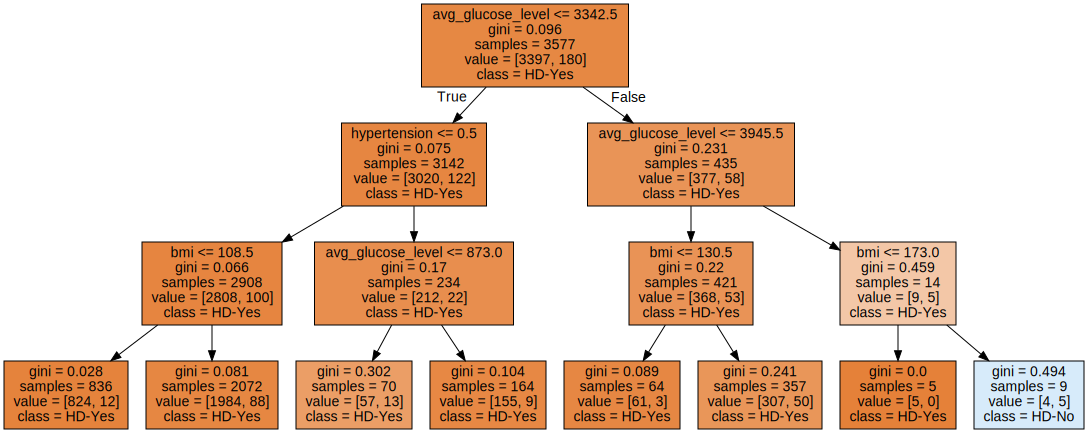

In [102]:
tr_gini = printTree(clf_gini)
tr_gini

In [103]:
y = data['stroke']
X = data.drop(['stroke'],axis=1)
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.377486340107362, 0.9772727272727273, 'X[1] <= 77.5\nentropy = 0.281\nsamples = 5110\nvalue = [4861, 249]'),
 Text(0.07453029141104295, 0.9318181818181818, 'X[1] <= 58.5\nentropy = 0.094\nsamples = 3491\nvalue = [3449, 42]'),
 Text(0.02044989775051125, 0.8863636363636364, 'X[6] <= 912.0\nentropy = 0.016\nsamples = 2027\nvalue = [2024, 3]'),
 Text(0.016359918200409, 0.8409090909090909, 'X[6] <= 910.5\nentropy = 0.05\nsamples = 531\nvalue = [528, 3]'),
 Text(0.012269938650306749, 0.7954545454545454, 'X[7] <= 161.5\nentropy = 0.036\nsamples = 530\nvalue = [528, 2]'),
 Text(0.0081799591002045, 0.75, 'entropy = 0.0\nsamples = 374\nvalue = [374, 0]'),
 Text(0.016359918200409, 0.75, 'X[1] <= 35.5\nentropy = 0.099\nsamples = 156\nvalue = [154, 2]'),
 Text(0.012269938650306749, 0.7045454545454546, 'X[0] <= 0.5\nentropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(0.0081799591002045, 0.6590909090909091, 'X[7] <= 229.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.004089979550

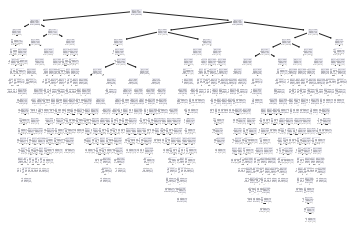

In [104]:
tree.plot_tree(clf)

In [111]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred_gini, y_test)
cm1 = confusion_matrix(y_pred_entropy, y_test)
#Printing the accuracy
print("Accuracy of GINI Decision Tree : ", accuracy(cm))
print("Accuracy of entropy Decision Tree : ", accuracy(cm1))

Accuracy of GINI Decision Tree :  0.9497716894977168
Accuracy of entropy Decision Tree :  0.9549902152641878


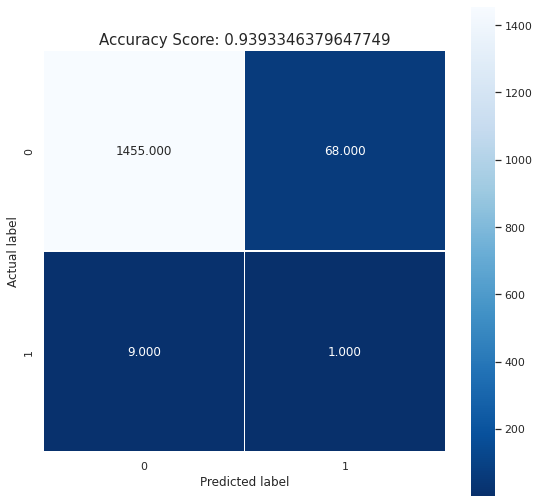

In [112]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**NON CONVENTIONAL CLASSIFIER**

Random Forrest

In [114]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [115]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9517286366601435


In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred)) 
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.9517286366601435
Precision: 0.35294117647058826
Recall: 0.08695652173913043
F1 Score: 0.140


In [117]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print("Accuracy of Random Forest : ", accuracy(cm))

Accuracy of Random Forest :  0.9517286366601435


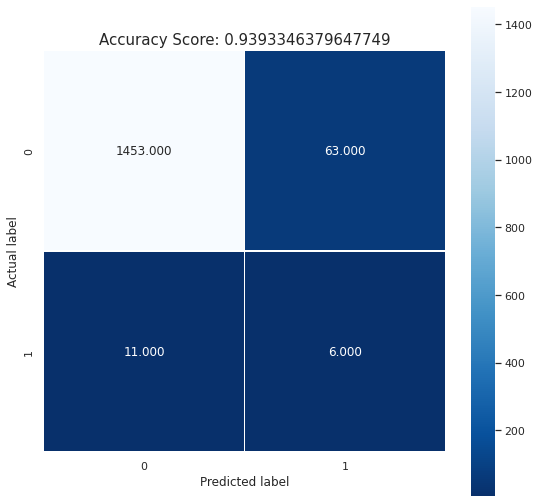

In [118]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9549902152641878


In [123]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print("Accuracy of Adaboost : ", accuracy(cm))

Accuracy of Adaboost :  0.9549902152641878


In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred)) 
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.9549902152641878
Precision: 0.0
Recall: 0.0
F1 Score: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


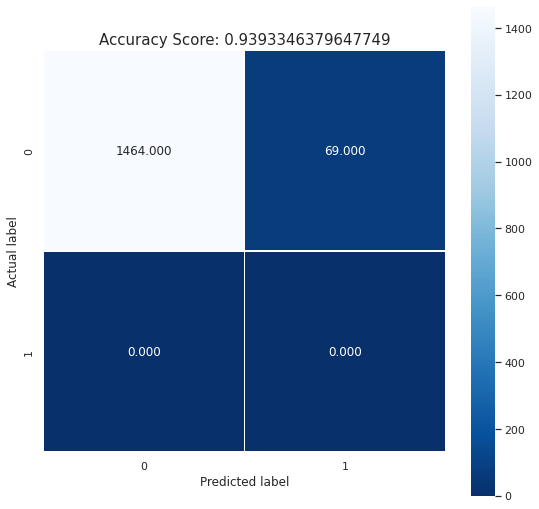

In [126]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

XgBoost

In [127]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)
predictions
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.9536855838225701


In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",accuracy_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions)) 
print('F1 Score: %.3f' % f1_score(y_test, predictions))

Accuracy: 0.9536855838225701
Precision: 0.0
Recall: 0.0
F1 Score: 0.000


In [130]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(predictions, y_test)

#Printing the accuracy
print("Accuracy of XGBoost : ", accuracy(cm))

Accuracy of XGBoost :  0.9536855838225701


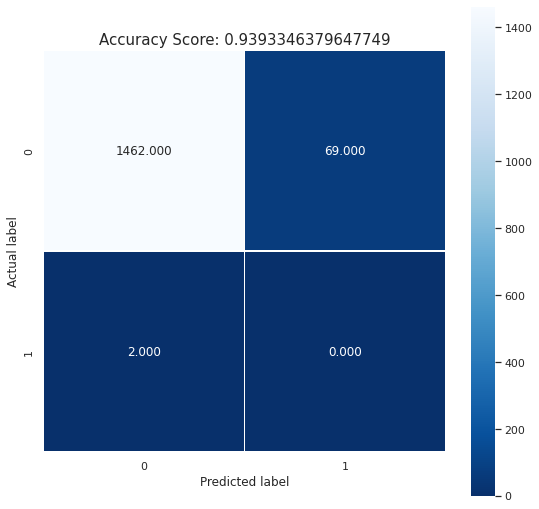

In [131]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);